#### Import the necessary libraries and modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Conv2D,MaxPool2D,AvgPool2D
from keras import backend as K

#### Import, analyze, and transform the data

In [0]:
from keras.datasets import cifar10

cifar = cifar10.load_data()

In [0]:
(X_train,y_train),(X_test,y_test) = cifar

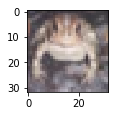

In [0]:
# Check how well you can distinguish the images, for instance image 12000.

plt.figure(figsize=(3,1.5))

plt.imshow(cifar[0][0][12000])

In [0]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def l_name(n):
  '''
  define a function that will return the label of the n-th image, e.g. l_name(12000) should return "frog" '''

  return labels[cifar[0][1][n][0]]

In [0]:
l_name(y_train[12000][0])

In [0]:
# X_train is a 4D tensor consisting of 50,000 images with size 32 by 32 pixels and with 3 color channels

X_train.shape

In [0]:
# before we feed the images to the concolutional neural net, we need to cast the pixels to the float format 
# and make sure the values of the pixels lie in the range [0;1]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_test.max()

In [0]:
from keras.utils.np_utils import to_categorical  
from keras.optimizers import RMSprop


In [0]:
# the method to_categorical() implements one hot-encoding to categorical values, 
# i.e. we convert verbal values to a vector of size 10 (since there are 10 labels)

y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

#### Build a CNN model

In [0]:
# convolutional neural network architecture

K.clear_session()

model = Sequential()

# convolutional layer with 32 filters of size 3*3. The input shape is the dimensions of the image fed to the filter, in this case a 32*32 RGB image.
model.add(Conv2D(filters = 32, kernel_size = (3,3),input_shape = (32,32,3),activation='relu'))
# another layer with 32 3*3 convolution filters
model.add(Conv2D(32,(3,3),activation='relu'))
# perform pooling and reduce dimensions by 2
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D(2,2))
model.add(Activation('relu'))
# convert the tensor into a 1D vector before feeding to a dense layer
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
# because it's a multi-class problem, the activation function of the last layer should be softmax,
# and since we have 10 classes there should be 10 units in that layer 
model.add(Dense(10,activation = 'softmax'))

In [0]:

model.compile(metrics = ['accuracy'],loss = 'categorical_crossentropy',optimizer = 'rmsprop')

In [0]:
# the model summary() method provides a nice and clear layout of the neural net architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 64)         

In [0]:
model.fit(X_train,y_train_cat,batch_size = 32,epochs = 5,validation_data=(X_test,y_test_cat),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 21s 427us/step - loss: 1.4410 - acc: 0.4850 - val_loss: 1.1293 - val_acc: 0.5999
Epoch 2/5
50000/50000 [==============================] - 21s 423us/step - loss: 1.0035 - acc: 0.6487 - val_loss: 1.0605 - val_acc: 0.6353
Epoch 3/5
50000/50000 [==============================] - 21s 418us/step - loss: 0.8235 - acc: 0.7153 - val_loss: 1.0639 - val_acc: 0.6479
Epoch 4/5
50000/50000 [==============================] - 21s 414us/step - loss: 0.7171 - acc: 0.7544 - val_loss: 0.9258 - val_acc: 0.7073
Epoch 5/5
50000/50000 [==============================] - 22s 433us/step - loss: 0.6580 - acc: 0.7758 - val_loss: 0.8872 - val_acc: 0.7154


In [0]:
def l_name_tr(n):
  ''' return the label of the n-th image in the test dataset '''
  return labels[y_test[n][0]]

In [0]:
model.predict(X_test[3000])
model.predict(X_test)[34].shape

(10,)

In [ ]:
X_test[1][0]


#### Evaluate performance of the model

In [0]:
model.predict(X_test)[50]

array([8.5589527e-05, 9.2927643e-05, 3.1321596e-02, 1.5246098e-04,
       1.5822065e-04, 2.8912839e-06, 1.9840384e-03, 4.2249325e-05,
       1.7503140e-06, 9.6615833e-01], dtype=float32)

In [0]:
def distr(n):
  ''' pass the number of the image and return label probability 
  distribution for that image on the left and the image itself
  on the right. This way you can easily compare your human recognition with the model's prediction '''
  x = labels
  y = model.predict(X_test)[n]
  plt.figure(figsize = (22,6))
  plt.subplot(1,2,1)
  plt.scatter(x,y,cmap='plasma')
  plt.subplot(1,2,2)
  plt.imshow(X_test[n])

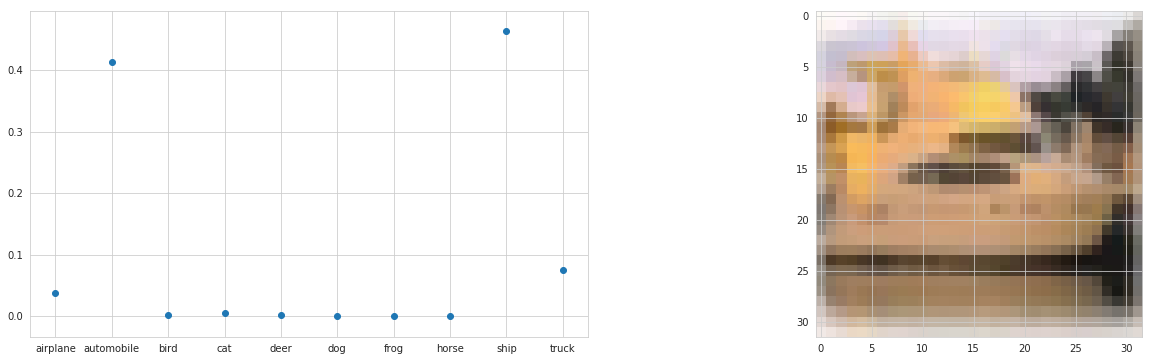

In [0]:
# compare image 7542 (on the right) to the model's prediction (on the left)
distr(7542)